In [1]:
#Smart Resume Screener


In [28]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#create dummy dataset
data = [
    {"JD": "Looking for a Python developer with experience in ML and AWS.",
     "Resume": "Experienced Python engineer skilled in ML, cloud computing, and AWS.",
     "Label": 1},
    
    {"JD": "Frontend developer needed with React and JavaScript skills.",
     "Resume": "Software engineer with strong Python and Django background.",
     "Label": 0},
    
    {"JD": "Data analyst required with expertise in SQL and Power BI.",
     "Resume": "Data analyst skilled in SQL, Tableau, and Power BI dashboards.",
     "Label": 1},
    
    {"JD": "Hiring DevOps engineer with Docker and Kubernetes experience.",
     "Resume": "DevOps engineer with Jenkins, CI/CD pipelines, and cloud computing knowledge.",
     "Label": 0},
    
    {"JD": "Looking for Machine Learning engineer with Python and TensorFlow.",
     "Resume": "ML engineer experienced in Python, deep learning, TensorFlow, and NLP.",
     "Label": 1},
    
    {"JD": "Backend developer required with Node.js and Express.js experience.",
     "Resume": "Backend developer with Node.js, Express.js, and MongoDB expertise.",
     "Label": 1},
    
    {"JD": "Cloud architect needed with Azure and AWS certifications.",
     "Resume": "AWS certified cloud architect with Azure expertise and cloud migration experience.",
     "Label": 1},
    
    {"JD": "Looking for an Android app developer skilled in Java and Kotlin.",
     "Resume": "Frontend web developer with JavaScript, HTML, and CSS knowledge.",
     "Label": 0},
    
    {"JD": "Full Stack Developer required with React, Node.js, and MongoDB.",
     "Resume": "Full stack engineer experienced in React, Node.js, MongoDB, and REST APIs.",
     "Label": 1},
    
    {"JD": "Cybersecurity analyst with knowledge of firewalls and penetration testing.",
     "Resume": "IT support engineer with hardware troubleshooting experience.",
     "Label": 0}
]

df = pd.DataFrame(data)
df

,JD,Resume,Label
0,Looking for a Python developer with experience...,"Experienced Python engineer skilled in ML, clo...",1
1,Frontend developer needed with React and JavaS...,Software engineer with strong Python and Djang...,0
2,Data analyst required with expertise in SQL an...,"Data analyst skilled in SQL, Tableau, and Powe...",1
3,Hiring DevOps engineer with Docker and Kuberne...,"DevOps engineer with Jenkins, CI/CD pipelines,...",0
4,Looking for Machine Learning engineer with Pyt...,"ML engineer experienced in Python, deep learni...",1
5,Backend developer required with Node.js and Ex...,"Backend developer with Node.js, Express.js, an...",1
6,Cloud architect needed with Azure and AWS cert...,AWS certified cloud architect with Azure exper...,1
7,Looking for an Android app developer skilled i...,"Frontend web developer with JavaScript, HTML, ...",0
8,"Full Stack Developer required with React, Node...","Full stack engineer experienced in React, Node...",1
9,Cybersecurity analyst with knowledge of firewa...,IT support engineer with hardware troubleshoot...,0


In [30]:
#text preprocess

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words] 
    return " ".join(words)

df['JD_clean'] = df['JD'].apply(clean_text)
df['Resume_clean'] = df['Resume'].apply(clean_text)
df



,JD,Resume,Label,JD_clean,Resume_clean
0,Looking for a Python developer with experience...,"Experienced Python engineer skilled in ML, clo...",1,looking python developer experience ml aws,experienced python engineer skilled ml cloud c...
1,Frontend developer needed with React and JavaS...,Software engineer with strong Python and Djang...,0,frontend developer needed react javascript skills,software engineer strong python django background
2,Data analyst required with expertise in SQL an...,"Data analyst skilled in SQL, Tableau, and Powe...",1,data analyst required expertise sql power bi,data analyst skilled sql tableau power bi dash...
3,Hiring DevOps engineer with Docker and Kuberne...,"DevOps engineer with Jenkins, CI/CD pipelines,...",0,hiring devops engineer docker kubernetes exper...,devops engineer jenkins cicd pipelines cloud c...
4,Looking for Machine Learning engineer with Pyt...,"ML engineer experienced in Python, deep learni...",1,looking machine learning engineer python tenso...,ml engineer experienced python deep learning t...
5,Backend developer required with Node.js and Ex...,"Backend developer with Node.js, Express.js, an...",1,backend developer required nodejs expressjs ex...,backend developer nodejs expressjs mongodb exp...
6,Cloud architect needed with Azure and AWS cert...,AWS certified cloud architect with Azure exper...,1,cloud architect needed azure aws certifications,aws certified cloud architect azure expertise ...
7,Looking for an Android app developer skilled i...,"Frontend web developer with JavaScript, HTML, ...",0,looking android app developer skilled java kotlin,frontend web developer javascript html css kno...
8,"Full Stack Developer required with React, Node...","Full stack engineer experienced in React, Node...",1,full stack developer required react nodejs mon...,full stack engineer experienced react nodejs m...
9,Cybersecurity analyst with knowledge of firewa...,IT support engineer with hardware troubleshoot...,0,cybersecurity analyst knowledge firewalls pene...,support engineer hardware troubleshooting expe...


In [32]:
#combine

df['combine'] = df['JD_clean'] + " " + df['Resume_clean']

#feature extraction

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combine'])
Y = df["Label"]

#train and test and split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

#model train

model = LogisticRegression()
model.fit(X_train, Y_train)

#evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
classification = classification_report(Y_test, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print(classification)

Accuracy 0.5
Precision 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Nij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=1000, random_state=42)
model1.fit(X_train, Y_train)

y_pred_new = model1.predict(X_test)
acc = accuracy_score(Y_test, y_pred_new)
print(acc)
classification1 = classification_report(Y_test, y_pred)
print(classification1)

0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Nij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, Y_train)

y_ped = model2.predict(X_test)
ac = accuracy_score(Y_test, y_ped)
print(ac)

0.5


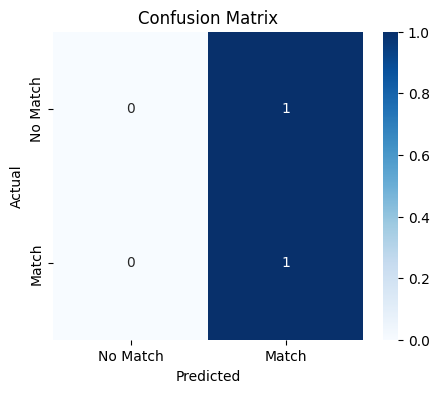

In [47]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Match", "Match"], yticklabels=["No Match", "Match"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [52]:
# ------------------------------
# Step 6: Prediction on New Data
# ------------------------------
new_data = [
    {
        "JD": "Looking for a machine learning engineer with Python and TensorFlow.",
        "Resume": "Engineer skilled in Python, TensorFlow, and AI research."
    },
    {
        "JD": "Hiring a cloud specialist with AWS and Kubernetes experience.",
        "Resume": "Data analyst skilled in Excel, SQL, and Power BI."
    }
]

new_df = pd.DataFrame(new_data)
new_df["JD_clean"] = new_df["JD"].apply(clean_text)
new_df["Resume_clean"] = new_df["Resume"].apply(clean_text)
new_df["combined"] = new_df["JD_clean"] + " " + new_df["Resume_clean"]

X_new = vectorizer.transform(new_df["combined"])
predictions = model.predict(X_new)

# Print Output
for i, pred in enumerate(predictions):
    print(f"\nJD: {new_data[i]['JD']}")
    print(f"Resume: {new_data[i]['Resume']}")
    print(f"Predicted Match: {pred}")


JD: Looking for a machine learning engineer with Python and TensorFlow.
Resume: Engineer skilled in Python, TensorFlow, and AI research.
Predicted Match: 1

JD: Hiring a cloud specialist with AWS and Kubernetes experience.
Resume: Data analyst skilled in Excel, SQL, and Power BI.
Predicted Match: 1
